<a href="https://colab.research.google.com/github/bbanzai88/Data-Science-Repository/blob/main/Knowledge_Graph_Pubmed_Abstracts_Complex_Senteces_to_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install coreferee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 4.9 MB/s 


In [ ]:
#Step 1: Import Libraries

In [ ]:
import spacy
import pandas as pd
import requests
from spacy import displacy
# import en_core_web_sm
 
nlp = spacy.load('en_core_web_sm')
 
from spacy.tokens import Span
from spacy.matcher import Matcher
 
import matplotlib.pyplot as plot
from tqdm import tqdm
import networkx as ntx
 
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from datetime import datetime, timedelta
import re
import csv
from tqdm import tqdm

import re
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
 !pip install spacy
 !pip install spacy-transformers
 !python3 -m spacy download en_core_web_trf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 4.4 MB 36.7 MB/s 
     |████████████████████████████████| 1.1 MB 36.2 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 101 kB 11.9 MB/s 
     |████████████████████████████████| 6.6 MB 17.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 460.3 MB 23 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
!python -m spacy download en_core_web_lg
!python -m coreferee install en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400.7 MB 6.3 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.4 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for coreferee-model-en: filename=coreferee_model_en-1.0.0-py3-none-any.whl size=32401736 sha256=178c43ab2427a557284dffb0c3f4fa61a97fe6e05da375e23bda2fa92e896286
  Stored in directory: /tmp/pip-ephem-wheel-cache-vx3w44py/wheels/6e/4d/40/0c67c4a6f34ccd20509fd0a10b702f6a3b2acb6f48e80fbf1f
Successfully built coreferee-model-en


In [ ]:
#Coreference
import spacy
import coreferee
import spacy_transformers


def coref_resolve(text):
    nlp1 = spacy.load('en_core_web_trf')
    nlp1.add_pipe('coreferee')
    doc1 = nlp1(text)
    tok_list = list(token.text for token in doc1)
    c = 0
    for chain in doc1._.coref_chains:
        for mention in chain:
            res1 = [doc1._.coref_chains.resolve(doc1[i]) for i in mention]
            res = list(filter((None).__ne__, res1))
            if len(res) != 0:
                if len(res[0]) == 1:
                    tok_list[mention[0] + c] = str(res[0][0])
                elif len(res[0]) > 1:
                    tok_list[mention[0] + c] = str(res[0][0])
                    for j in range(1, len(res[0])):
                        tok_list.insert(mention[0] + c + j, str(res[0][j]))
                        c = c + 1
    textres = " ".join(tok_list)
    return textres

In [ ]:
pm_subset = pd.read_csv('/content/sample_data/pm_subset.csv')
data = pm_subset['abstract']

In [ ]:
text_coreffed = [coref_resolve(j) for j in tqdm(data)]


  0%|          | 0/499 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

100%|██████████| 499/499 [59:35<00:00,  7.16s/it]


In [ ]:
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.5 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 21.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#Complex Sentence Splitting into simple sentences
import spacy
nlp = spacy.load('en_core_web_md')

def compound_to_simple(sentence):
    doc = nlp(sentence)
    
    root_token = None
    for token in doc:
        if (token.dep_ == "ROOT"):
            root_token = token
            
    other_verbs = []
    for token in doc:
        ancestors = list(token.ancestors)
        if (token.pos_ == "VERB" and len(ancestors) < 3 and token != root_token):
            other_verbs.append(token)
            
    token_spans = []
    all_verbs = [root_token] + other_verbs
    for other_verb in all_verbs:
        first_token_index = len(doc)
        last_token_index = 0
        this_verb_children = list(other_verb.children)
        for child in this_verb_children:
            if (child not in all_verbs):
                if (child.i < first_token_index):
                    first_token_index = child.i
                if (child.i > last_token_index):
                    last_token_index = child.i
        token_spans.append((first_token_index, last_token_index))
        
    sentence_clauses = []
    for token_span in token_spans:
        start = token_span[0]
        end = token_span[1]
        if (start < end):
            clause = doc[start:end]
            sentence_clauses.append(clause)
    sentence_clauses = sorted(sentence_clauses, key=lambda tup: tup[0])
    clauses_text = [clause.text for clause in sentence_clauses]
    return clauses_text

In [ ]:
simple_sentences = [compound_to_simple(j) for j in tqdm(text_coreffed)]


100%|██████████| 499/499 [00:28<00:00, 17.33it/s]


In [ ]:
#Step 2: Extract Entities

def extract_entities(sents):
    # chunk one
    enti_one = ""
    enti_two = ""
    
    dep_prev_token = "" # dependency tag of previous token in sentence
    
    txt_prev_token = "" # previous token in sentence
    
    prefix = ""
    modifier = ""
    
    
    
    for tokn in nlp(sents):
        # chunk two
        ## move to next token if token is punctuation
        
        if tokn.dep_ != "punct":
            #  check if token is compound word or not
            if tokn.dep_ == "compound":
                prefix = tokn.text
                # add current word to it if prevoius word is 'compound
                if dep_prev_token == "compound":
                    prefix = txt_prev_token + " "+ tokn.text
                    
            # verify if token is modifier or not
            if tokn.dep_.endswith("mod") == True:
                modifier = tokn.text
                # add it to the current word if previous word is 'compound'
                if dep_prev_token == "compound":
                    modifier = txt_prev_token + " "+ tokn.text
                    
            # chunk3
            if tokn.dep_.find("subj") == True:
                enti_one = modifier +" "+ prefix + " "+ tokn.text
                prefix = ""
                modifier = ""
                dep_prev_token = ""
                txt_prev_token = ""
                
            # chunk4 
            if tokn.dep_.find("obj") == True:
                enti_two = modifier +" "+ prefix +" "+ tokn.text
                
            # chunk 5
            # update variable
            dep_prev_token = tokn.dep_
            txt_prev_token = tokn.text
            
    return [enti_one.strip(), enti_two.strip()]


In [ ]:
pairs_of_entities = []
for i in tqdm(text_coreffed):
#for i in tqdm(pm_subset['abstract'][:500]):
    pairs_of_entities.append(extract_entities(i))


100%|██████████| 499/499 [00:19<00:00, 25.30it/s]


In [ ]:
#Step 3: Relation Extraction

def obtain_relation(sent):
    
    doc = nlp(sent)
    
    matcher = Matcher(nlp.vocab)
    
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}]
    
    #matcher.add("matching_1", None, pattern)
    matcher.add("matching_1", [pattern])
    
    matcher = matcher(doc)
    h = len(matcher) - 1
    
    span = doc[matcher[h][1]:matcher[h][2]]
    
    return (span.text)

In [ ]:
relations = [obtain_relation(j) for j in tqdm(text_coreffed)]
#relations = [obtain_relation(j) for j in tqdm(pm_subset['abstract'][:500])]


100%|██████████| 499/499 [00:20<00:00, 24.57it/s]


  0%|          | 0/499 [1:11:03<?, ?it/s]


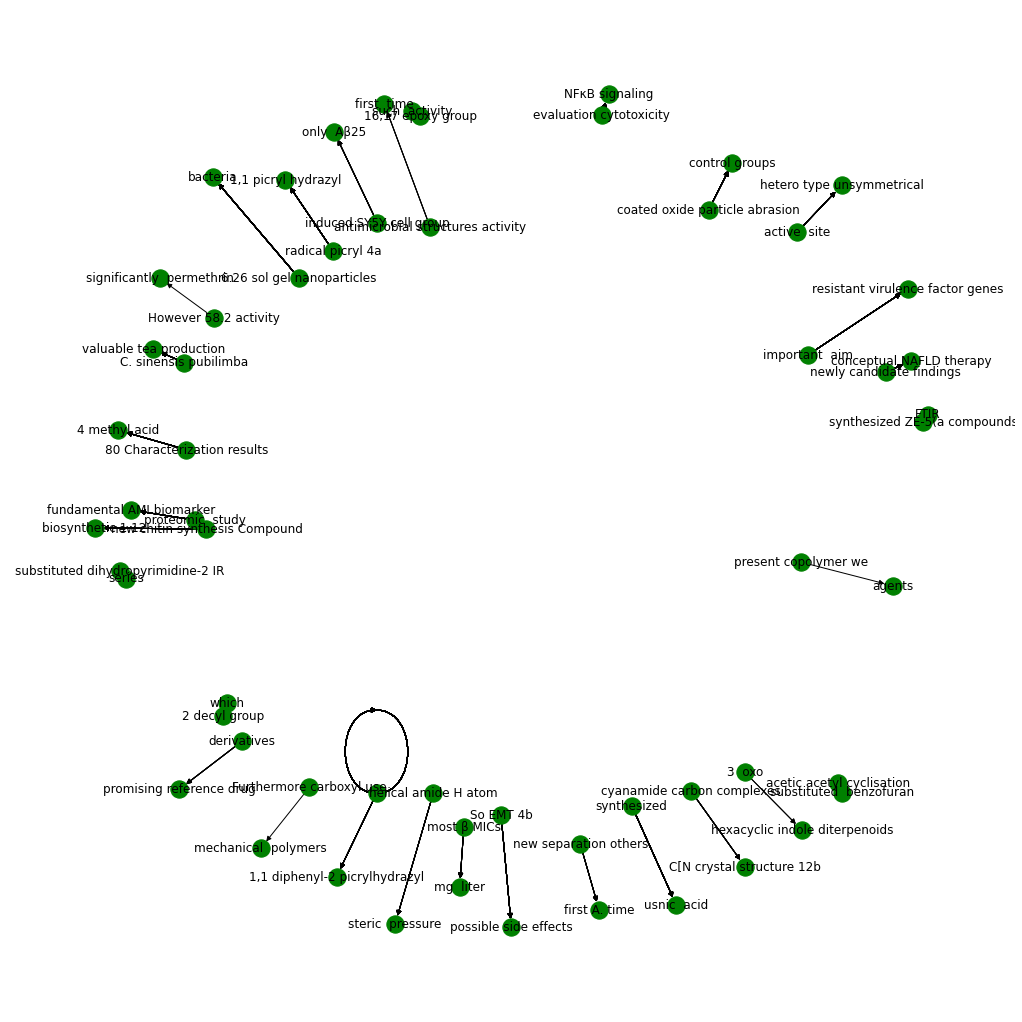

In [ ]:
#Step 4: Build and Visualize the Knowledge Graph

# subject extraction
source = [j[0] for j in pairs_of_entities]

#object extraction
target = [k[1] for k in pairs_of_entities]

data_kgf = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
# Create DG from the dataframe
graph = ntx.from_pandas_edgelist(data_kgf, "source", "target", 
                          edge_attr=True, create_using=ntx.MultiDiGraph())
plot.figure(figsize=(14, 14))

posn = ntx.spring_layout(graph)
ntx.draw(graph, with_labels=True, node_color='green', edge_cmap=plot.cm.Blues, pos = posn)
plot.show()